In [1]:
import pandas as pd
import numpy as np

#Relleno nulos
from feature_engine import imputation as mdi

import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from kmodes.kmodes import KModes


## Info PPT

In [3]:
# Sacando datos para ppt
df_info= pd.read_csv('DF_completo.csv')

In [6]:
df_info.shape

(14036, 73)

In [ ]:
df_info.shape

In [8]:
df_info.P2.value_counts()

Mujer     7169
Hombre    6755
Name: P2, dtype: int64

## Revision Data

In [ ]:
#df_nuevo.dropna(thresh = 36)
#utilizar para cada dataset

#dividir data en fumadores y no fumadores
#dopn con un thresh de la mitad
#resto relleno de nulos


#despues aplicar el modelo

In [3]:
 df= pd.read_spss('CHILE_16_emtj_2016parasubir.sav')

In [ ]:
df.P2.value_counts()

NameError: name 'df' is not defined

In [5]:
#columnas a eliminar

col_drop = []

for col in df.columns:
    if df[col].nunique() == 1:
        print(f'{col}: {df[col].nunique()}')
        col_drop.append(col)

WGTFLAG: 1
Year: 1
State: 1
SchoolType: 1


In [222]:
df_2 = df[['RegionName','P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45',
       'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55',
       'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65',
       'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72']]

In [8]:
df_2.to_csv('DF_completo.csv', index=False)

In [9]:
df_2.head(2)

,RegionName,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72
0,Arica y Parinacota,NaN,Mujer,7º básico,"En general, no tengo dinero para gastar en mí ...",No,Yo nunca he tratado de fumar cigarrillos,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,No,...,Yo nunca he fumado,Absolutamente no,No,Ninguno de ellos,Probablemente no,Es un tonto,Es una tonta,No,No sé,No sé
1,Arica y Parinacota,12,Mujer,7º básico,"En general, no tengo dinero para gastar en mí ...",No,Yo nunca he tratado de fumar cigarrillos,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,No,...,Yo nunca he fumado,Probablemente no,No,Algunos de ellos,Absolutamente no,Es un tonto,Es una tonta,No sé,Sí,No sé


In [257]:
df_2.P6.value_counts()

Yo nunca he tratado de fumar cigarrillos    7484
12 a 13 años de edad                        2179
14 a 15 años de edad                        2040
10 a 11 años de edad                         829
16 años o más                                614
8 a 9 años de edad                           296
7 años o menos                               253
Name: P6, dtype: int64

In [56]:
#preguntas = ['P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
#       'P16', 'P17']
#for p in preguntas:
#    print (f'{p}: {df_2[p].unique()}')

In [47]:
# Intento fallido de respuestas 100% no fumadores
#no_fumadores = df_2[(df_2.P6 == 'Yo nunca he tratado de fumar cigarrillos')&(df_2.P7 == 'Ningún día')&(df_2.P8 == 'Yo no fumé cigarrillos durante los últimos  30 días (un mes).')
                    &(df_2.P9 =='No')&(df_2.P11 =='Yo no fumo tabaco')& (df_2.P12 == 'Yo no fumo tabaco')&(df_2.P15 =='Yo no fumo')&(df_2.P15 =='No fumo.')&(df_2.P17 =='Yo nunca he fumado')]

In [102]:
no_fumadores = df_2[(df_2.P6 == 'Yo nunca he tratado de fumar cigarrillos')]

In [103]:
no_fumadores.dropna(thresh = 36, inplace =True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [104]:
#se eliminan columnas relacionadas al uso del tabaco
no_fumadores.drop(columns=['P3','P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P36', 'P37', 'P38'], inplace=True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [223]:
fumadores = df_2[(df_2.P6 != 'Yo nunca he tratado de fumar cigarrillos')]

In [224]:
fumadores.dropna(thresh = 36, inplace =True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [225]:
#se elimina curso
fumadores.drop(columns=['P3'], inplace=True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [193]:
## Separar y juntar el df
df_2.dropna(thresh = 36, inplace =True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [195]:
no_fumadores_2 = df_2[(df_2.P6 == 'Yo nunca he tratado de fumar cigarrillos')]
fumadores_2 = df_2[(df_2.P6 != 'Yo nunca he tratado de fumar cigarrillos')]

In [263]:
fumadores_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 18 to 14035
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RegionName  6484 non-null   object  
 1   P1          6484 non-null   category
 2   P2          6484 non-null   category
 3   P3          6484 non-null   category
 4   P4          6484 non-null   category
 5   P5          6484 non-null   category
 6   P6          6484 non-null   category
 7   P7          6484 non-null   category
 8   P8          6484 non-null   category
 9   P9          6484 non-null   category
 10  P10         6484 non-null   category
 11  P11         6484 non-null   category
 12  P12         6484 non-null   category
 13  P13         6484 non-null   category
 14  P14         6484 non-null   category
 15  P15         6484 non-null   category
 16  P16         6484 non-null   category
 17  P17         6484 non-null   category
 18  P18         6484 non-null   category
 19  P19 

## Relleno de nulos

In [215]:
nulos = mdi.CategoricalImputer('frequent', variables = ['P1', 'P2', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45',
       'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55',
       'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65',
       'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72'])

nulos_2 = mdi.CategoricalImputer('frequent', variables = list(no_fumadores.columns))

In [106]:
no_fumadores=nulos_2.fit_transform(no_fumadores)

In [112]:
no_fumadores.RegionName.value_counts()

Arica y Parinacota    1668
Valparaiso            1552
Tarapaca              1500
Bio Bio               1397
Metropolitana         1340
Name: RegionName, dtype: int64

In [226]:
fumadores=nulos.fit_transform(fumadores)

In [199]:
## ejemplos para separar y volver a unir
no_fumadores_2=nulos.fit_transform(no_fumadores_2)
fumadores_2=nulos.fit_transform(fumadores_2)

In [201]:
df_unido =pd.concat((no_fumadores_2, fumadores_2), ignore_index=True)

# Modelo

## No fumadores

### completo

In [143]:
no_fumadores.columns

Index(['RegionName', 'P1', 'P2', 'P4', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P39', 'P40', 'P41', 'P42',
       'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52',
       'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62',
       'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72'],
      dtype='object')

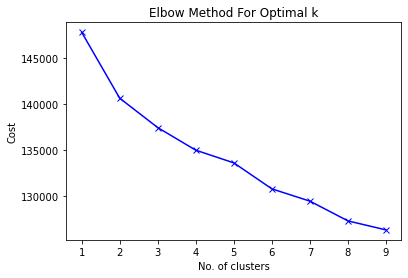

In [107]:
# Elbow curve to find optimal K no fumadores con todas las preguntas
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,n_init=5)
    kmode.fit_predict(no_fumadores)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [132]:
# 4 clusters

kmode_no_fumadores4  = KModes(n_clusters=4)
clusters_no_fumadores = kmode_no_fumadores4.fit_predict(no_fumadores)

In [134]:
pd.DataFrame(kmode_no_fumadores4.cluster_centroids_, columns = no_fumadores.columns)

,RegionName,P1,P2,P4,P25,P26,P27,P28,P29,P30,...,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72
0,Arica y Parinacota,13,Hombre,Entre 700 y 3.500 pesos,Ningún día,Ningún día,Siempre me siento molesto(a),Si,Ningún día,No,...,Yo nunca he fumado,Absolutamente no,No sé,Ninguno de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No sé,No sé
1,Valparaiso,15,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,"Nada, no me importa, me da lo mismo",No,De 1 a 2 días,Si,...,Yo nunca he fumado,Probablemente no,Sí,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
2,Tarapaca,14,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,En algunas ocasiones me siento molesto(a),Si,De 1 a 2 días,No,...,Yo nunca he fumado,Absolutamente no,No,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No sé,No sé
3,Valparaiso,12,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,Siempre me siento molesto(a),Si,Ningún día,No,...,Yo nunca he fumado,Absolutamente no,No,Ninguno de ellos,Absolutamente no,Le falta confianza / es inseguro,Le falta confianza / es insegura,No,No,No


In [135]:
kmode_no_fumadores4.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [136]:
no_fumadores_completo = no_fumadores.copy()

In [137]:
no_fumadores_completo['custer']=kmode_no_fumadores4.labels_

In [138]:
no_fumadores_completo.custer.value_counts()

0    4165
2    1137
1    1091
3    1064
Name: custer, dtype: int64

In [110]:
# 6 clusters

kmode_no_fumadores  = KModes(n_clusters=6)
clusters_no_fumadores = kmode_no_fumadores.fit_predict(no_fumadores)

In [111]:
pd.DataFrame(kmode_no_fumadores.cluster_centroids_, columns = no_fumadores.columns)

,RegionName,P1,P2,P4,P25,P26,P27,P28,P29,P30,...,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72
0,Arica y Parinacota,13,Hombre,Entre 700 y 3.500 pesos,Ningún día,Ningún día,Siempre me siento molesto(a),Si,Ningún día,No,...,Yo nunca he fumado,Absolutamente no,No sé,Ninguno de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No sé,No sé
1,Valparaiso,15,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,"Nada, no me importa, me da lo mismo",No,De 1 a 2 días,Si,...,Yo nunca he fumado,Probablemente no,Sí,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
2,Arica y Parinacota,14,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,En algunas ocasiones me siento molesto(a),Si,De 1 a 2 días,No,...,Yo nunca he fumado,Absolutamente no,No,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
3,Tarapaca,12,Mujer,Entre 700 y 3.500 pesos,Ningún día,Ningún día,Siempre me siento molesto(a),Si,Ningún día,No,...,Yo nunca he fumado,Absolutamente no,Sí,Ninguno de ellos,Absolutamente no,Le falta confianza / es inseguro,Le falta confianza / es insegura,No,No,No
4,Arica y Parinacota,17 y más,Hombre,"En general, no tengo dinero para gastar en mí ...",Ningún día,Ningún día,Siempre me siento molesto(a),Si,Ningún día,Si,...,Yo nunca he fumado,Absolutamente no,No,Algunos de ellos,Absolutamente no,Es un tonto,Es una tonta,No,No sé,No sé
5,Tarapaca,13,Mujer,"En general, no tengo dinero para gastar en mí ...",Ningún día,Ningún día,"Nada, no me importa, me da lo mismo",No,Ningún día,No,...,Yo nunca he fumado,Absolutamente no,No sé,Ninguno de ellos,Absolutamente no,No pienso nada,No pienso nada,No sé,No sé,No sé


In [131]:
no_fumadores_completo2 = no_fumadores.copy()
no_fumadores_completo2['cluster']=kmode_no_fumadores.labels_
no_fumadores_completo2.cluster.value_counts()

0    3224
5    1058
1     898
4     844
3     734
2     699
Name: cluster, dtype: int64

### parcial

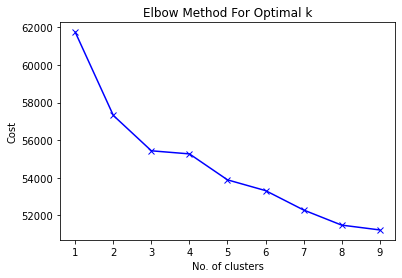

In [144]:
# Modelo parcial
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,n_init=5)
    kmode.fit_predict(no_fumadores[['RegionName', 'P1', 'P2', 'P25', 'P26','P29',
       'P31', 'P32','P34', 'P35', 'P40','P46', 'P47','P50', 'P51','P55', 'P56','P61','P63', 'P66','P70']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [151]:
kmode_no_fumadores_parcial  = KModes(n_clusters=3)
clusters_nf_parcial = kmode_no_fumadores_parcial.fit_predict(no_fumadores[['RegionName', 'P1', 'P2', 'P25', 'P26','P29',
       'P31', 'P32','P34', 'P35', 'P40','P46', 'P47','P50', 'P51','P55', 'P56','P61','P63', 'P66','P70']])

In [239]:
pd.DataFrame(kmode_no_fumadores_parcial.cluster_centroids_, columns = ['RegionName', 'P1', 'P2', 'P25', 'P26','P29',
       'P31', 'P32','P34', 'P35', 'P40','P46', 'P47','P50', 'P51','P55', 'P56','P61','P63', 'P66','P70']).T

#0-> Bajo Riesgo
#1-> riesgo alto
#2-> Riesgo medio

,0,1,2
RegionName,Arica y Parinacota,Tarapaca,Metropolitana
P1,13,15,14
P2,Hombre,Mujer,Mujer
P25,Ningún día,Ningún día,Ningún día
P26,Ningún día,Ningún día,De 1 a 2 días
P29,Ningún día,De 1 a 2 días,De 1 a 2 días
P31,Indudablemente sí,Probablemente sí,Probablemente sí
P32,Si,Si,Si
P34,No,No,No
P35,Si,No,Si


In [153]:
no_fumadores_parcial = no_fumadores.copy()
no_fumadores_parcial['cluster']=kmode_no_fumadores_parcial.labels_
no_fumadores_parcial.cluster.value_counts()

0    5053
1    1280
2    1124
Name: cluster, dtype: int64

In [210]:
    no_fumadores_parcial.to_csv('no_fumadores_parcial.csv', index=False)

In [253]:
# Modas de todas las preguntas por cluster
pd.concat([no_fumadores_parcial[no_fumadores_parcial.cluster==0].mode().T, no_fumadores_parcial[no_fumadores_parcial.cluster==1].mode().T, 
           no_fumadores_parcial[no_fumadores_parcial.cluster==2].mode().T], axis=1)

,0,0,0
RegionName,Arica y Parinacota,Tarapaca,Metropolitana
P1,13,15,14
P2,Hombre,Mujer,Mujer
P4,Entre 700 y 3.500 pesos,Entre 700 y 3.500 pesos,Entre 700 y 3.500 pesos
P25,Ningún día,Ningún día,Ningún día
P26,Ningún día,Ningún día,De 1 a 2 días
P27,Siempre me siento molesto(a),"Nada, no me importa, me da lo mismo",En algunas ocasiones me siento molesto(a)
P28,Si,Si,Si
P29,Ningún día,De 1 a 2 días,De 1 a 2 días
P30,No,No,No


## Fumadores

## Completo

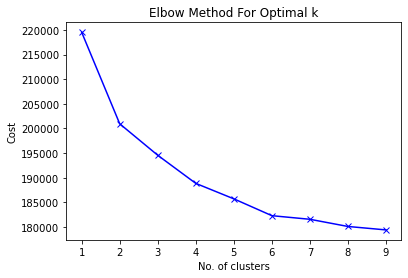

In [113]:
# Elbow curve to find optimal K fumadores
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,n_init=5)
    kmode.fit_predict(fumadores)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [118]:
# 6 clusters

kmode_fumadores  = KModes(n_clusters=6)
clusters_fumadores = kmode_fumadores.fit_predict(fumadores)

In [121]:
pd.DataFrame(kmode_fumadores.cluster_centroids_, columns = fumadores.columns)

,RegionName,P1,P2,P4,P5,P6,P7,P8,P9,P10,...,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72
0,Valparaiso,17 y más,Hombre,Entre 700 y 3.500 pesos,Si,12 a 13 años de edad,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,No,No,...,Yo nunca he fumado,Absolutamente no,No,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
1,Valparaiso,17 y más,Mujer,Entre 700 y 3.500 pesos,Si,12 a 13 años de edad,1 a 2 días,1 cigarrillo por día,No,No,...,"No, nunca me permiten fumar",Probablemente no,No,La mayoría de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
2,Metropolitana,15,Mujer,Entre 700 y 3.500 pesos,Si,14 a 15 años de edad,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,Si,No,...,"No, nunca me permiten fumar",Probablemente no,Sí,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé
3,Metropolitana,17 y más,Mujer,Entre 700 y 3.500 pesos,Si,12 a 13 años de edad,10 a 19 días,2 a 5 cigarrillos por día,Si,Si,...,"Sí, siempre me permiten fumar",Probablemente sí,Sí,La mayoría de ellos,Probablemente no,No pienso nada,No pienso nada,No,No,No sé
4,Tarapaca,16,Mujer,Entre 700 y 3.500 pesos,Si,12 a 13 años de edad,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,No,No,...,"No, nunca me permiten fumar",Absolutamente no,No sé,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No sé,No sé
5,Arica y Parinacota,17 y más,Mujer,Entre 700 y 3.500 pesos,Si,12 a 13 años de edad,Ningún día,Yo no fumé cigarrillos durante los últimos 30...,No,No,...,"No, nunca me permiten fumar",Absolutamente no,No,Algunos de ellos,Absolutamente no,No pienso nada,No pienso nada,No,No,No sé


In [139]:
fumadores['cluster']=kmode_fumadores.labels_
fumadores.cluster.value_counts()

0    1332
1    1187
2    1077
5     993
3     965
4     930
Name: cluster, dtype: int64

In [141]:
fumadores.P60.value_counts()

Estoy en desacuerdo                     1996
En la actualidad yo fumo cigarrillos    1495
Estoy de acuerdo                        1449
Estoy en total desacuerdo               1072
Estoy totalmente de acuerdo              472
Name: P60, dtype: int64

## Parcial

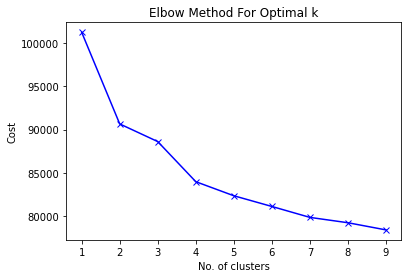

In [158]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,n_init=5)
    kmode.fit_predict(fumadores[['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [227]:
kmode_fumadores_parcial  = KModes(n_clusters=5)
clusters_fumadores_parcial = kmode_fumadores_parcial.fit_predict(fumadores[['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70']])

In [228]:
clusters_fumadores = pd.DataFrame(kmode_fumadores_parcial.cluster_centroids_, columns = ['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70'])
clusters_fumadores.T

,0,1,2,3,4
RegionName,Arica y Parinacota,Valparaiso,Bio Bio,Valparaiso,Valparaiso
P1,17 y más,17 y más,17 y más,17 y más,17 y más
P2,Mujer,Hombre,Mujer,Hombre,Hombre
P6,14 a 15 años de edad,14 a 15 años de edad,12 a 13 años de edad,12 a 13 años de edad,12 a 13 años de edad
P8,Yo no fumé cigarrillos durante los últimos 30...,2 a 5 cigarrillos por día,2 a 5 cigarrillos por día,Yo no fumé cigarrillos durante los últimos 30...,2 a 5 cigarrillos por día
P12,Yo no fumo tabaco,Yo nunca siento un deseo intenso de fumar nuev...,Yo nunca siento un deseo intenso de fumar nuev...,Yo no fumo tabaco,Yo nunca siento un deseo intenso de fumar nuev...
P15,Yo no fumo,En fiestas y reuniones sociales,"En lugares públicos (por ejemplo: parques, en ...",Yo no fumo,En fiestas y reuniones sociales
P16,No fumo.,Cuando estoy en reuniones sociales (con amigos...,Cuando estoy en reuniones sociales (con amigos...,No fumo.,Cuando estoy en reuniones sociales (con amigos...
P19,Yo no fumo ahora,No,No,Yo nunca he fumado,Sí
P20,Yo no he fumado en los últimos 12 meses,No,No,Yo nunca he fumado,Sí


In [230]:
fumadores['cluster']=kmode_fumadores_parcial.labels_
fumadores.cluster.value_counts()

0    2265
3    1403
2    1373
4     729
1     714
Name: cluster, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1 a 2 días'),
  Text(1, 0, '10 a 19 días'),
  Text(2, 0, '20 a 29 días'),
  Text(3, 0, '3 a 5 días'),
  Text(4, 0, '6 a 9 días'),
  Text(5, 0, 'Ningún día'),
  Text(6, 0, 'Todos los días del  último mes.')])

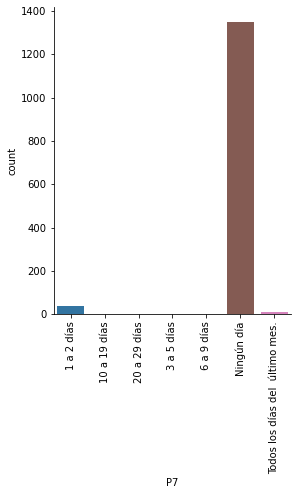

In [191]:
sns.catplot(data = fumadores[fumadores.cluster == 3] , x ='P7', kind='count')
plt.xticks(rotation = 90)

In [ ]:
sns.catplot(data = fumadores[fumadores.cluster == 0] , x ='P6', kind='count')
plt.xticks(rotation = 45)

In [232]:
#con 3 clusters
kmode_fumadores_parcial  = KModes(n_clusters=3)
clusters_fumadores_parcial = kmode_fumadores_parcial.fit_predict(fumadores[['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70']])

In [235]:
clusters_fumadores3 = pd.DataFrame(kmode_fumadores_parcial.cluster_centroids_, columns = ['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70'])
clusters_fumadores3.T

#0-> Curiosos
#1-> Fumador  Circunstancial
#2-> Fumador social o by choice

,0,1,2
RegionName,Arica y Parinacota,Valparaiso,Bio Bio
P1,17 y más,17 y más,17 y más
P2,Mujer,Hombre,Mujer
P6,12 a 13 años de edad,12 a 13 años de edad,12 a 13 años de edad
P8,Yo no fumé cigarrillos durante los últimos 30...,2 a 5 cigarrillos por día,2 a 5 cigarrillos por día
P12,Yo no fumo tabaco,Yo nunca siento un deseo intenso de fumar nuev...,Yo nunca siento un deseo intenso de fumar nuev...
P15,Yo no fumo,En fiestas y reuniones sociales,"En lugares públicos (por ejemplo: parques, en ..."
P16,No fumo.,Cuando estoy en reuniones sociales (con amigos...,Cuando estoy en reuniones sociales (con amigos...
P19,Yo no fumo ahora,No,No
P20,Yo no he fumado en los últimos 12 meses,Sí,Sí


In [237]:
fumadores3=fumadores.drop(columns='cluster')

In [238]:
fumadores3['cluster']=kmode_fumadores_parcial.labels_
fumadores3.cluster.value_counts()

0    3507
2    1584
1    1393
Name: cluster, dtype: int64

In [240]:
fumadores3.to_csv('fumadores3.csv', index=False)

In [236]:
len(clusters_fumadores3.columns)

30

In [260]:
# Modas de todas las preguntas por cluster
pd.concat([fumadores3[fumadores3.cluster==0].mode().T, fumadores3[fumadores3.cluster==1].mode().T, fumadores3[fumadores3.cluster==2].mode().T], 
          keys= ['curioso', 'Fumador cirscunstancial', 'Fumador by choice'], axis=1)[:50]

,curioso,Fumador cirscunstancial,Fumador by choice
,0,0,0
RegionName,Arica y Parinacota,Valparaiso,Bio Bio
P1,17 y más,17 y más,17 y más
P2,Mujer,Hombre,Mujer
P4,Entre 700 y 3.500 pesos,Entre 700 y 3.500 pesos,Entre 700 y 3.500 pesos
P5,Si,Si,Si
P6,12 a 13 años de edad,12 a 13 años de edad,12 a 13 años de edad
P7,Ningún día,1 a 2 días,1 a 2 días
P8,Yo no fumé cigarrillos durante los últimos 30...,2 a 5 cigarrillos por día,2 a 5 cigarrillos por día
P9,No,Si,Si


In [261]:
pd.concat([fumadores3[fumadores3.cluster==0].mode().T, fumadores3[fumadores3.cluster==1].mode().T, fumadores3[fumadores3.cluster==2].mode().T], 
          keys= ['curioso', 'Fumador cirscunstancial', 'Fumador by choice'], axis=1)[50:]

,curioso,Fumador cirscunstancial,Fumador by choice
,0,0,0
P51,No,Sí,No
P52,No,Quizás,No
P53,No,No,No
P54,No,No,No
P55,Ninguno de ellos,Los dos (mi mamá y mi papá),Ninguno de ellos
P56,De ninguna manera,Probablemente sí,Probablemente sí
P57,De ninguna manera,Probablemente sí,Probablemente sí
P58,Probablemente sí,Probablemente sí,Probablemente sí
P59,El tabaco no influye para nada,El tabaco no influye para nada,El tabaco no influye para nada


# Juntos

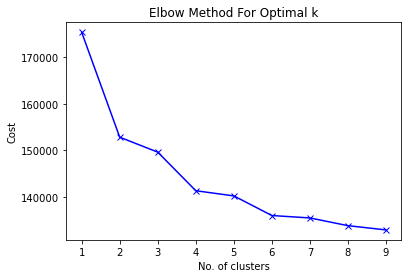

In [203]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters,n_init=5)
    kmode.fit_predict(df_unido[['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [205]:
kmode_todos  = KModes(n_clusters=6)
clusters_tot = kmode_todos.fit_predict(df_unido[['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70']])

In [207]:
clusters=pd.DataFrame(kmode_todos.cluster_centroids_, columns = ['RegionName','P1', 'P2', 'P6', 'P8','P12','P15',
       'P16','P19', 'P20','P22','P24', 'P25',
       'P26','P29','P31', 'P32','P34', 'P35',
       'P36','P40','P46','P50', 'P51','P55',
       'P56', 'P61', 'P63','P66','P70'])

In [208]:
for col in list(clusters.columns):
    if clusters[col].nunique() > 2:
        print(col)
                      

RegionName
P1
P6
P19
P20
P22
P56
P66


In [252]:
clusters.T

,0,1,2,3,4,5
RegionName,Arica y Parinacota,Valparaiso,Metropolitana,Metropolitana,Tarapaca,Valparaiso
P1,13,16,17 y más,17 y más,14,17 y más
P2,Hombre,Hombre,Mujer,Hombre,Mujer,Mujer
P6,Yo nunca he tratado de fumar cigarrillos,12 a 13 años de edad,14 a 15 años de edad,Yo nunca he tratado de fumar cigarrillos,Yo nunca he tratado de fumar cigarrillos,12 a 13 años de edad
P8,Yo no fumé cigarrillos durante los últimos 30...,Yo no fumé cigarrillos durante los últimos 30...,Yo no fumé cigarrillos durante los últimos 30...,Yo no fumé cigarrillos durante los últimos 30...,Yo no fumé cigarrillos durante los últimos 30...,2 a 5 cigarrillos por día
P12,Yo no fumo tabaco,Yo no fumo tabaco,Yo nunca siento un deseo intenso de fumar nuev...,Yo no fumo tabaco,Yo no fumo tabaco,Yo nunca siento un deseo intenso de fumar nuev...
P15,Yo no fumo,Yo no fumo,Yo no fumo,Yo no fumo,Yo no fumo,En fiestas y reuniones sociales
P16,No fumo.,No fumo.,Cuando estoy en reuniones sociales (con amigos...,No fumo.,No fumo.,Cuando estoy en reuniones sociales (con amigos...
P19,Yo nunca he fumado,Yo no fumo ahora,Yo no fumo ahora,Yo nunca he fumado,Yo nunca he fumado,No
P20,Yo nunca he fumado,Yo no he fumado en los últimos 12 meses,Sí,Yo nunca he fumado,Yo nunca he fumado,No
